## Прогноз на минималках

Using **Prophet**


14:01:44 - cmdstanpy - INFO - Chain [1] start processing
14:01:44 - cmdstanpy - INFO - Chain [1] done processing


           ds             y
0  2014-02-01   7828.366889
1  2014-03-01   9970.834039
2  2014-04-01  10339.298785
3  2014-05-01  10953.784810
4  2014-06-01  11490.057461
5  2014-07-01  12571.612306
6  2014-08-01  12183.275218
7  2014-09-01  12039.055934
8  2014-10-01  11236.686770
9  2014-11-01   8692.689083
10 2014-12-01   9438.762306
11 2015-01-01   9766.969120


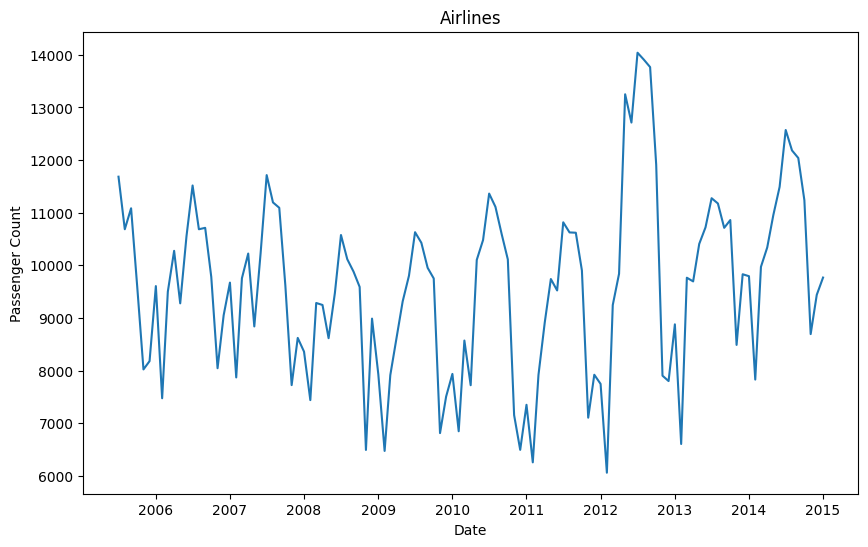

In [76]:
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import csv


def draw_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.title("Airlines")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.plot(x, y)
    plt.show()


df = pd.read_csv('airplanes.csv')
df['Activity Period'] = pd.to_datetime(df['Activity Period'])
df.rename(columns={'Activity Period': 'ds', 'Passenger Count': 'y'}, inplace=True)
# draw_plot(df['ds'], df['y'])

m = Prophet(
    # n_changepoints=100,
)
m.fit(df)

future = m.make_future_dataframe(periods=12, freq='MS', include_history=False)

forecast = m.predict(future)
forecast = forecast.rename(columns={'ds': 'ds', 'yhat': 'y'})[['ds', 'y']]
print(forecast.head(12))

df_with_future = pd.concat([df, forecast], axis=0)
draw_plot(df_with_future['ds'], df_with_future['y'])
result = [(ds.strftime('%Y-%m-%d'), round(y)) for ds, y in zip(forecast['ds'], forecast['y'])]

with open('output.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Activity Period', 'Passenger Count'])
    writer.writerows(result)

In [32]:
df = pd.read_csv('airplanes.csv')

df['Activity Period'] = pd.to_datetime(df['Activity Period'])
# df['Activity Period'] = df['Activity Period'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

df.rename(columns={'Activity Period': 'ds', 'Passenger Count': 'y'}, inplace=True)

df.info()
df.describe()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      103 non-null    datetime64[ns]
 1   y       103 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


,ds,y
0,2005-07-01,11684
1,2005-08-01,10685
2,2005-09-01,11084
3,2005-10-01,9604
4,2005-11-01,8021
...,...,...
95,2013-06-01,10722
96,2013-07-01,11275
97,2013-08-01,11175
98,2013-09-01,10712


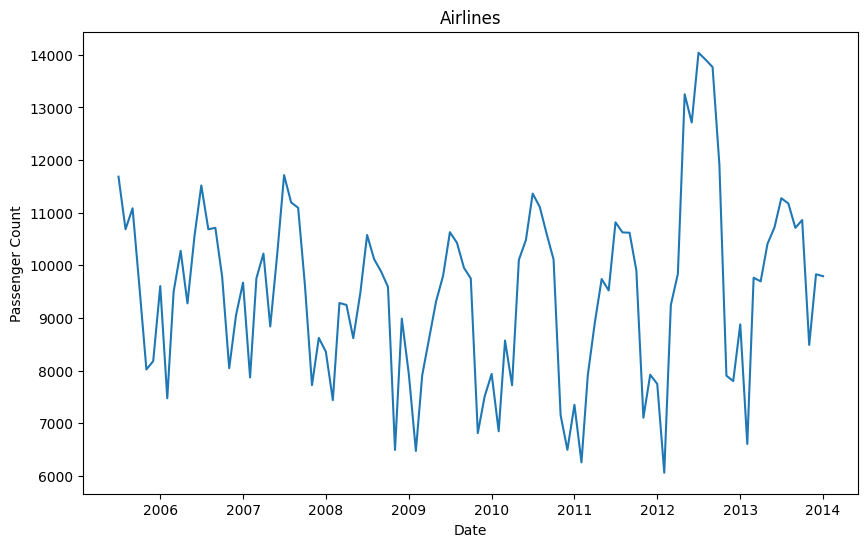

In [33]:
draw_plot(df['ds'], df['y'])

In [44]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=100, freq='MS', include_history=False)
# future.tail()

forecast = m.predict(future)
forecast = forecast.rename(columns={'ds': 'ds', 'yhat': 'y'})[['ds', 'y']]
forecast.info()
forecast.head(20)

13:28:48 - cmdstanpy - INFO - Chain [1] start processing
13:28:48 - cmdstanpy - INFO - Chain [1] done processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


,ds,y
0,2014-02-01,7828.366889
1,2014-03-01,9970.834039
2,2014-04-01,10339.298785
3,2014-05-01,10953.784810
4,2014-06-01,11490.057461
5,2014-07-01,12571.612306
6,2014-08-01,12183.275218
7,2014-09-01,12039.055934
8,2014-10-01,11236.686770
9,2014-11-01,8692.689083


<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      203 non-null    datetime64[ns]
 1   y       203 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


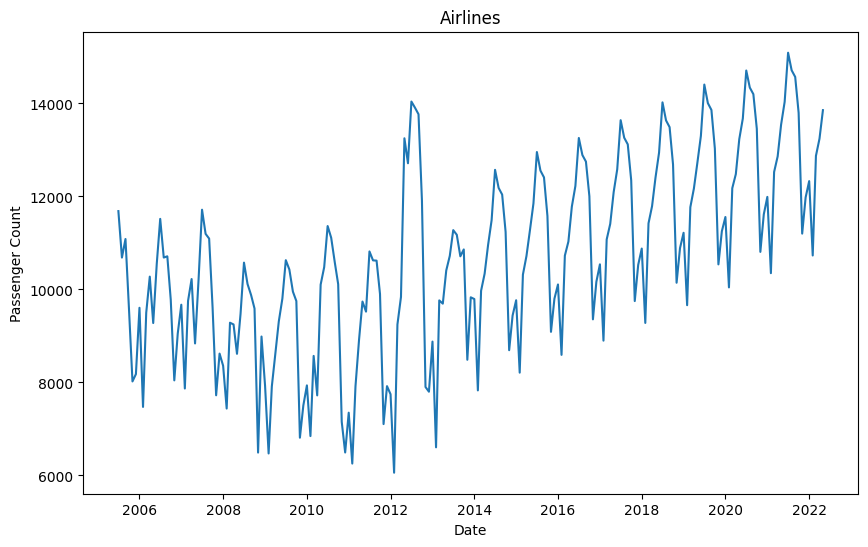

In [46]:
df_with_future = pd.concat([df, forecast], axis=0)
df_with_future.info()

draw_plot(df_with_future['ds'], df_with_future['y'])